In [3]:
%matplotlib inline

from centrality.eigentrust import EigenTrust
from centrality.indegree import InDegree
from centrality.indegree_positive import InDegreePositive
from centrality.pagerank import PageRank
from evaluations.community.online_discussion_group import OnlineDiscussionGroup
from output.chart import chart
from output.metrics import print_metrics, print_stddev_metrics
from simulation.community import ActionProfile
from simulation.member import Member

# Activity Test


In this test, it is investigated whether equally competent and productive students are ranked higher when they contribute more actively, i.e. vote and post more than their less active peers. It is expected that more avid contributors will be ranked higher by a reputation algorithm.

In [7]:
test_name = "Activity"
community: OnlineDiscussionGroup = OnlineDiscussionGroup()

ALL_CENTRALITY_SCORES = [
  PageRank(),
  EigenTrust(),
  InDegree(),
  InDegreePositive()
]

# Possible Actions
actions: ActionProfile = community.action_profile

### Student Archetypes

The first group of archetypes are students that expose low activity. ...

In [8]:
#Group low activity
low_active_student = Member("low", [
  (0.028, actions.post_good_comment),
  (0.012, actions.post_bad_comment),
  (0.056, actions.vote_bad_comment_negative),
  (0.024, actions.vote_any_comment_negative),
  (0.056, actions.vote_good_comment_positive),
  (0.024, actions.vote_any_comment_positive),
  (0.8, actions.stay_idle)
])
community.create_members_by_prototype(low_active_student, 10)

Students of mediocre activity are students that ...

In [9]:
#Group medium activity
medium_active_student = Member("med", [
  (0.07, actions.post_good_comment),
  (0.03, actions.post_bad_comment),
  (0.14, actions.vote_bad_comment_negative),
  (0.06, actions.vote_any_comment_negative),
  (0.14, actions.vote_good_comment_positive),
  (0.06, actions.vote_any_comment_positive),
  (0.5, actions.stay_idle)
])
community.create_members_by_prototype(medium_active_student, 10)

Highly active behavior is considered as ...

In [10]:
#Group high activity
high_active_student = Member("high", [
  (0.14, actions.post_good_comment),
  (0.06, actions.post_bad_comment),
  (0.28, actions.vote_bad_comment_negative),
  (0.12, actions.vote_any_comment_negative),
  (0.28, actions.vote_good_comment_positive),
  (0.12, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(high_active_student, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Final Metrics: InDegreePositive ########
Distinction: 10.9206735436
Correctness: 0.034482758620689655
Inversion Quality: 1.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction:       0.8358634884564446 (0.5626218468536099)
Correctness:       0.033112541433999484 (0.006529140857814482)
Inversion Quality: 0.8902 (0.037844183466184365)


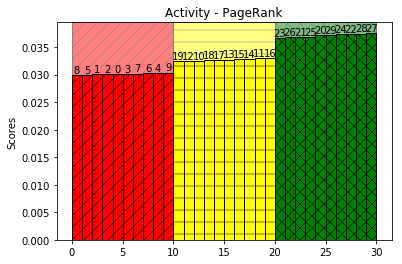

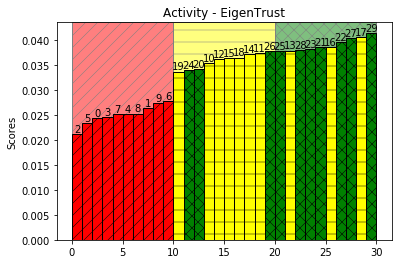

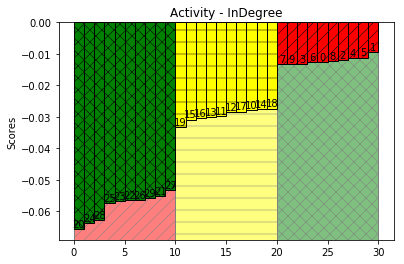

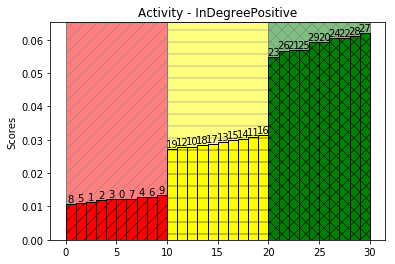

In [13]:
groups = ('low', 'med', 'high')
colors = {
  'low': 'r',
  'med': 'yellow',
  'high': 'g'
}
results = community.simulate(ALL_CENTRALITY_SCORES, 100, 100)
for (name, result, intermediate_results) in results:
  c = chart(result, groups, colors, test_name + " - " + name)

print_metrics(name, result, groups)
print_stddev_metrics(name, intermediate_results, groups)